In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 
from sklearn.metrics.pairwise import euclidean_distances

path = '/Users/nicolelubaczewska/Downloads/retail.csv'
rt = pd.read_csv(path)

In [2]:
rt.head()

,time,year,quarter,sales,storeP
0,1,1990,1,8170.963815,0.683045
1,2,1990,2,1066.348809,0.702390
2,3,1990,3,13654.164540,0.762351
3,4,1990,4,8115.502773,0.595537
4,5,1991,1,5861.740359,0.625679


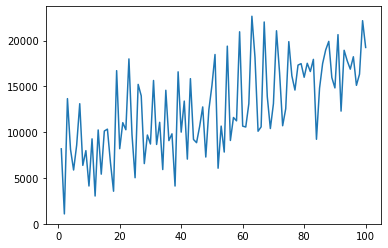

In [3]:
#Q1.d.

plt.plot(rt.time, rt.sales)
plt.show()

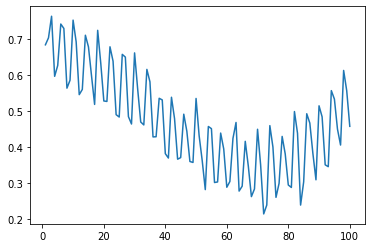

In [4]:
#Q2.b.

plt.plot(rt.time, rt.storeP)
plt.show()

<AxesSubplot:xlabel='quarter'>

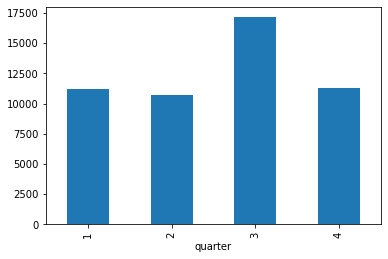

In [5]:
#Q3.c.

rt[["quarter", "sales"]].groupby("quarter").mean().plot(kind = 'bar',legend = False)

In [10]:
#Q4.b.

reg1 = smf.ols('sales ~ C(quarter)', data = rt).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     12.89
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.80e-07
Time:                        18:03:03   Log-Likelihood:                -974.98
No. Observations:                 100   AIC:                             1958.
Df Residuals:                      96   BIC:                             1968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.124e+04    847.149     13.269      0.000    9559.082    1.29e+04
C(quarter)[T.2]  -506.5095   1198.049     -0.423      0.673   -2884.619    1871.600
C(quarter)[T.3]  5904.4235   1198.049      4.928      0.000    3526.314    8282.533
C(quarter)[T.4]    30.3812   1198.049      0.025      0.980   -2347.728    2408.490
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.973
Skew:                           0.050   Prob(JB):                        0.373
Kurtosis:                       2.319   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Q5.d.

reg2 = smf.ols('sales ~ C(quarter)', data = rt).fit()
summary_col(reg2, stars = True)


,sales
Intercept,11240.6586***
,(847.1488)
C(quarter)[T.2],-506.5095
,(1198.0493)
C(quarter)[T.3],5904.4235***
,(1198.0493)
C(quarter)[T.4],30.3812
,(1198.0493)
R-squared,0.2872
R-squared Adj.,0.2649


In [8]:
#Q6.c.

reg3 = smf.ols('sales ~ time + C(quarter)', data = rt).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     59.30
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.22e-25
Time:                        17:17:42   Log-Likelihood:                -929.31
No. Observations:                 100   AIC:                             1869.
Df Residuals:                      95   BIC:                             1882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5784.8741    707.680      8.174      0.000    4379.951    7189.797
C(quarter)[T.2]  -617.8520    762.846     -0.810      0.420   -2132.293     896.589
C(quarter)[T.3]  5681.7384    763.018      7.446      0.000    4166.956    7196.520
C(quarter)[T.4]  -303.6464    763.304     -0.398      0.692   -1818.997    1211.704
time              111.3425      9.350     11.909      0.000      92.781     129.904
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.999
Skew:                          -0.010   Prob(JB):                        0.607
Kurtosis:                       2.511   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Q7.a.


reg4 = smf.ols('sales ~ time + C(quarter)', data = rt).fit()
reg5 = smf.ols('sales ~ time + I(time ** 2) + C(quarter)', data = rt).fit()
reg6 = smf.ols('sales ~ time + I(time ** 2) + I(time ** 3) + C(quarter)', data = rt).fit()
reg7 = smf.ols('sales ~ time + I(time ** 2) + I(time ** 3) + I(time ** 4) + C(quarter)', data = rt).fit()

summary_col([reg4, reg5, reg6, reg7],
            stars = True,
            regressor_order = ['Intercept', 'time'])


,sales I,sales II,sales III,sales IIII
Intercept,5784.8741***,6143.9813***,6322.3945***,5771.4908***
,(707.6801),(944.8722),(1206.9777),(1510.8550)
time,111.3425***,90.2063**,68.9457,173.5549
,(9.3497),(37.8634),(96.5861),(197.0130)
C(quarter)[T.2],-617.8520,-617.4335,-613.9741,-615.9714
,(762.8460),(765.5425),(769.5457),(772.1644)
C(quarter)[T.3],5681.7384***,5682.1570***,5689.0653***,5687.0680***
,(763.0178),(765.7150),(770.1239),(772.7445)
C(quarter)[T.4],-303.6464,-303.6464,-293.2787,-293.2787
,(763.3042),(766.0021),(771.0881),(773.7051)


In [34]:
#Q8.c.


reg8 = smf.ols('storeP ~ time', data = rt).fit()
reg9 = smf.ols('storeP ~ time + I(time ** 2)', data = rt).fit()
reg10 = smf.ols('storeP ~ time + I(time ** 2) + I(time ** 3)', data = rt).fit()
reg11 = smf.ols('storeP ~ time + I(time ** 2) + I(time ** 3) + I(time ** 4)', data = rt).fit()

summary_col([reg8, reg9, reg10, reg11],
            stars = True,
            regressor_order = ['Intercept', 'time'])



,storeP I,storeP II,storeP III,storeP IIII
Intercept,0.6253***,0.7720***,0.6849***,0.6864***
,(0.0213),(0.0258),(0.0327),(0.0421)
time,-0.0030***,-0.0117***,-0.0016,-0.0019
,(0.0004),(0.0012),(0.0028),(0.0057)
I(time ** 2),,0.0001***,-0.0002**,-0.0002
,,(0.0000),(0.0001),(0.0002)
I(time ** 3),,,0.0000***,0.0000
,,,(0.0000),(0.0000)
I(time ** 4),,,,0.0000
,,,,(0.0000)


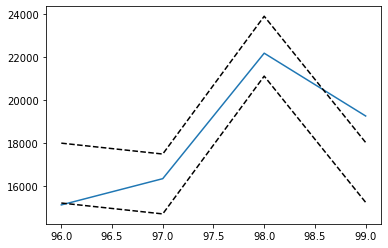

In [80]:
#Q9.d.


### Q9

fcTable = reg4.get_prediction(rt).summary_frame()
rt['ciL'] = fcTable['mean_ci_lower']
rt['ciU'] = fcTable['mean_ci_upper']

rt.sales[rt.year == 2021].plot()
rt.ciL[rt.year == 2021].plot(color = 'black', linestyle = 'dashed')
rt.ciU[rt.year == 2021].plot(color = 'black', linestyle = 'dashed')
plt.show()

# D

In [81]:
#Q10. c

reg8 = smf.ols('storeP ~ time', data = rt).fit()
reg12 = smf.ols('storeP ~ time + C(quarter)', data = rt).fit()
reg13 = smf.ols('storeP ~ time + I(time ** 2) + I(time ** 3) + C(quarter)', data = rt).fit()
reg11 = smf.ols('storeP ~ time + I(time ** 2) + I(time ** 3) + I(time ** 4)', data = rt).fit()

summary_col([reg8, reg12, reg13, reg11],
            stars = True,
            regressor_order = ['Intercept', 'time'])




,storeP I,storeP II,storeP III,storeP IIII
Intercept,0.6253***,0.5519***,0.6132***,0.6864***
,(0.0213),(0.0203),(0.0118),(0.0421)
time,-0.0030***,-0.0030***,-0.0015,-0.0019
,(0.0004),(0.0003),(0.0009),(0.0057)
C(quarter)[T.2],,0.1632***,0.1617***,
,,(0.0219),(0.0075),
C(quarter)[T.3],,0.1258***,0.1227***,
,,(0.0219),(0.0075),
C(quarter)[T.4],,0.0036,-0.0013,
,,(0.0219),(0.0075),


In [85]:
path = '/Users/nicolelubaczewska/Downloads/bfi.csv'

bfi = pd.read_csv(path)

bfi.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2,4,3,4,4,2,3,3,4,4,...,3,4,2,2,3,3,6,3,4,3
1,2,4,5,2,5,5,4,4,3,4,...,3,3,3,5,5,4,2,4,3,3
2,5,4,5,4,4,4,5,4,2,5,...,4,5,4,2,3,4,2,5,5,2
3,4,4,6,5,5,4,4,3,5,5,...,2,5,2,4,1,3,3,4,3,5
4,2,3,3,4,5,4,4,5,3,2,...,2,3,4,4,3,3,3,4,3,3


In [88]:
#Q11.d

BFI = pd.DataFrame(scale(bfi))
BFI.columns = bfi.columns

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(BFI)

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = BFI.columns
centroids.iloc[0].sort_values()


E2   -0.708647
C5   -0.690833
N4   -0.690514
N1   -0.624774
N2   -0.616976
C4   -0.608230
N3   -0.592632
N5   -0.545435
E1   -0.463970
O2   -0.376621
A1   -0.336623
O5   -0.314015
O4    0.016787
C2    0.410750
A4    0.417676
C3    0.418721
O1    0.469982
C1    0.473143
A2    0.478023
O3    0.510978
A3    0.536227
E5    0.600183
E3    0.617356
A5    0.618770
E4    0.628858
Name: 0, dtype: float64

In [102]:
#Q12.a.
centroids.iloc[2].sort_values()

E4   -1.045032
A3   -0.948521
A5   -0.904454
A2   -0.757219
A4   -0.722952
E3   -0.701287
O2   -0.451917
O5   -0.443522
E5   -0.402147
C4   -0.153765
N5   -0.133280
N1   -0.019729
N3    0.030540
C3    0.068671
N2    0.070258
O3    0.084812
C5    0.126715
O1    0.213705
N4    0.343121
C2    0.352032
O4    0.353085
A1    0.357850
C1    0.421075
E2    0.752805
E1    0.753971
Name: 2, dtype: float64

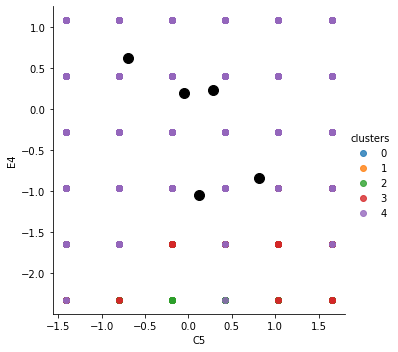

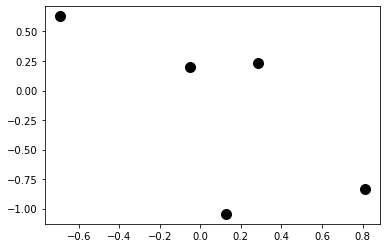

In [106]:
#Q13.b.

import seaborn as sb

bfi = BFI
bfi['clusters'] = kmeans.labels_
sb.lmplot(x = 'C5', y = 'E4', hue = 'clusters', data = bfi, fit_reg = False)
plt.scatter(centroids.C5, centroids.E4, color = 'black', s = 100)
plt.show()

### Q13

bfi = BFI
bfi['clusters'] = kmeans.labels_
plt.scatter(centroids.C5, centroids.E4, color = 'black', s = 100)
plt.show()

# B



In [108]:
#Q14.a.,c., d.

In [110]:
#Q15.b.,d.